In [9]:
%pylab inline
import pandas as pd
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

Populating the interactive namespace from numpy and matplotlib


In [10]:
from glob import glob

In [11]:
results = {}
for i, fname in enumerate(glob('bootstrap_cb_result_*.csv')):
    results[i] = pd.read_csv(fname, index_col=0).sort_values('g')  # Sorting is important

In [12]:
h = pd.concat(results)

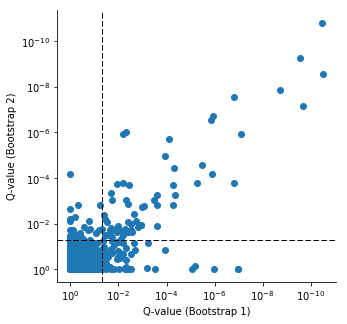

In [88]:
figsize(5, 5)
plt.loglog()

plt.scatter(h.loc[0]['qval'],
            h.loc[1]['qval'],
            rasterized=True);

plt.gca().invert_xaxis();
plt.gca().invert_yaxis();

plt.axhline(0.05, lw=1, c='k', ls='--')
plt.axvline(0.05, lw=1, c='k', ls='--');
plt.xlabel('Q-value (Bootstrap 1)')
plt.ylabel('Q-value (Bootstrap 2)');

plt.savefig('booststrap_qvals.pdf');

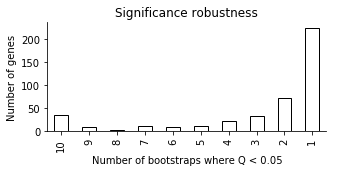

In [85]:
figsize(5, 2)
h.query('qval < 0.05') \
    .groupby('g')[['qval']] \
    .count() \
    .sort_values('qval', ascending=False) \
    ['qval'].value_counts() \
    .sort_index(ascending=False) \
    .plot(kind='bar', color='w', edgecolor='k');
    
plt.ylabel('Number of genes')
plt.xlabel('Number of bootstraps where Q < 0.05');
plt.title('Significance robustness')

plt.savefig('significance_robustness.pdf')

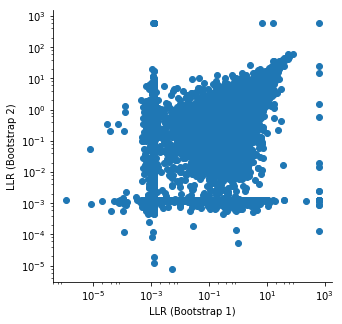

In [34]:
figsize(5, 5)
plt.loglog()

plt.scatter(h.loc[0]['LLR'],
            h.loc[1]['LLR']);

plt.xlabel('LLR (Bootstrap 1)')
plt.ylabel('LLR (Bootstrap 2)');

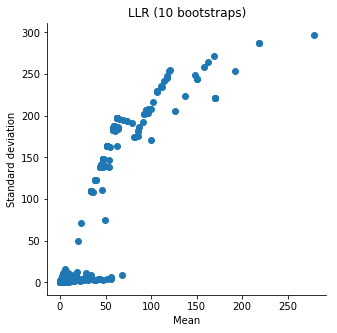

In [40]:
plt.scatter(h.groupby('g')['LLR'].mean(),
            h.groupby('g')['LLR'].std());

plt.title('LLR (10 bootstraps)')
plt.xlabel('Mean')
plt.ylabel('Standard deviation');

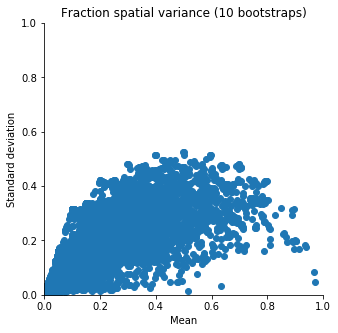

In [89]:
plt.scatter(h.groupby('g')['fraction_spatial_variance'].mean(),
            h.groupby('g')['fraction_spatial_variance'].std(),
            rasterized=True);

plt.title('Fraction spatial variance (10 bootstraps)')
plt.xlabel('Mean')
plt.ylabel('Standard deviation');
plt.ylim(0, 1);
plt.xlim(0, 1);

plt.savefig('FSV_bootstraps.pdf')

In [90]:
h['log_snr'] = np.log10(1. / h['max_delta'])

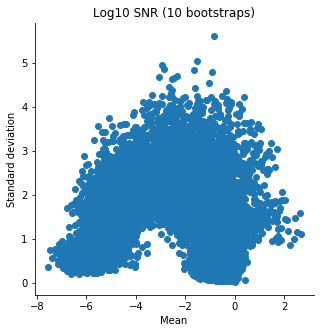

In [92]:
plt.scatter(h.groupby('g')['log_snr'].mean(),
            h.groupby('g')['log_snr'].std(),
            rasterized=True);

plt.title('Log10 SNR (10 bootstraps)')
plt.xlabel('Mean')
plt.ylabel('Standard deviation');

plt.savefig('SNR_bootstraps.pdf');

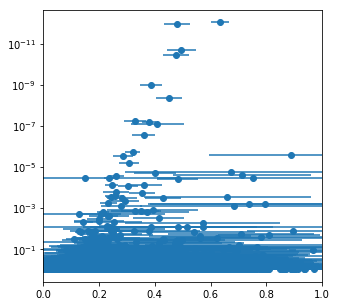

In [277]:
plt.yscale('log')
plt.errorbar(h.groupby('g')['fraction_spatial_variance'].mean(),
             h.loc[3]['qval'],
             xerr=h.groupby('g')['fraction_spatial_variance'].std(), fmt='o')

plt.gca().invert_yaxis();
plt.xlim(0, 1);

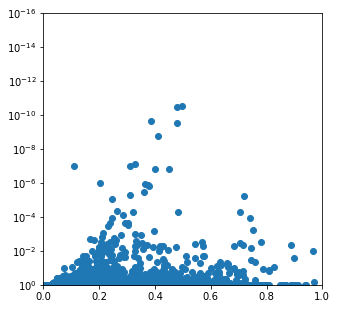

In [294]:
plt.yscale('log')

plt.scatter(h.groupby('g')['fraction_spatial_variance'].mean(),
             h.loc[0]['qval'],)


plt.xlim(0, 1);
plt.ylim(1e-16, 1.)
plt.gca().invert_yaxis();

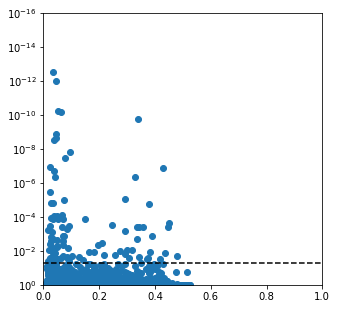

In [296]:
plt.yscale('log')

plt.scatter(h.groupby('g')['fraction_spatial_variance'].std(),
             h.loc[2]['qval'],)

plt.ylim(1e-16, 1.)

plt.gca().invert_yaxis();
plt.xlim(0, 1);

plt.axhline(0.05, c='k', ls='--');